# Predictive Max Acceleration

## Import Libraries

In [23]:
import pandas as pd               # pandas is a dataframe library
import matplotlib.pyplot as plt   # matplotlib.pyplot plots data
import numpy as np                # numpy provides N-dim object support
import statsmodels.api as sm      # a Python module that provides classes and functions for the estimation of many different statistical models

# do ploting inline instead of in a seperate window
%matplotlib inline

## Load and review data

In [24]:
#df = pd.read_csv("./data/HashBrake.csv")     # load hashbrake data
#df = pd.read_csv("./data/3534040162583442.csv")     # load hashbrake data
#df = pd.read_csv("./data/9000000000504750424.csv")     # load hashbrake data
#df = pd.read_csv("./data/HashBrake_prod.csv")     # load hashbrake data
df = pd.read_csv("./data/Prod_acceleration_ml.csv")     # load hashbrake data

In [25]:
df.shape

(2236, 4)

In [26]:
df.head(5)

,startspeed,maxacceleration,odometer,duration
0,65,442,385996.8598,2
1,74,329,385999.7398,2
2,74,340,386063.5498,2
3,57,322,386063.6798,1
4,75,476,386078.0498,1


### Definition of features

| Feature | Description |
|-------------------|-------------------|
| Duration | time between Hashbrake starts and speed slows down to 0 |
| StartSpeed | the speed when Hashbrake starts |
| MaxAcceleration | the max acceleration during Hashbrake |

## Check for null values

In [27]:
df.isnull().values.any()

False

In [28]:
def plot_corr(df, size=3):
    """
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Display:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
    """
    corr = df.corr()   # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

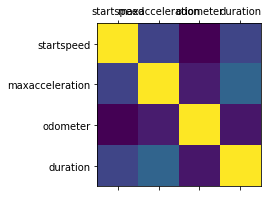

In [29]:
plot_corr(df)

In [30]:
df.corr()

,startspeed,maxacceleration,odometer,duration
startspeed,1.000000,0.131666,-0.084904,0.141993
maxacceleration,0.131666,1.000000,-0.001323,0.263133
odometer,-0.084904,-0.001323,1.000000,-0.021072
duration,0.141993,0.263133,-0.021072,1.000000


## Check Data Types

In [230]:
df.head(5)

,StartSpeed,MaxAcceleration,Duration
0,22.00,291,1.0
1,43.56,241,2.0
2,91.80,272,8.2
3,94.32,482,5.0
4,60.48,262,4.2


## Fitting Multiple Linear Regression Algorithm

In [31]:
# import data frame
x = df.iloc[:, :-1].values
y = df.iloc[:, 3].values

In [32]:
# split the data frame into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.25, random_state = 0)

In [33]:
# fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(x_train, y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [34]:
# predicting the test set results
y_pred = regressor.predict(x_test)

In [35]:
y_confidence = regressor.score(x_test, y_test)
print("This is the prediction accuracy", y_confidence)

This is the prediction accuracy 0.08796541474729724


In [20]:
# prediction with sklearn
#New_duration = 7.0
#New_startspeed = 44.64
#New_MaxAcceleration = 305
#print("Predict max acceleration: \n", regressor.predict([[New_duration, New_startspeed, New_MaxAcceleration]]))
#print("Predict max acceleration: \n", regressor.predict([[New_startspeed, New_MaxAcceleration]]))

In [36]:
# with statsmodels
x = sm.add_constant(x)         # adding a constant
regressor_OLS = sm.OLS(y, x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     65.66
Date:                Fri, 17 Aug 2018   Prob (F-statistic):           1.10e-40
Time:                        16:36:33   Log-Likelihood:                -2713.4
No. Observations:                2236   AIC:                             5435.
Df Residuals:                    2232   BIC:                             5458.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3257      0.222      1.465      0.143      -0.110       0.762
x1             0.0043      0.001      5.269      0.000       0.003       0.006
x2             0.0031      0.000     12.158      0.000       0.003       0.004
x3         -2.494e-07    4.4e-07     -0.567      0.571   -1.11e-06    6.13e-07
==============================================================================
Omnibus:                     1059.127   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6715.127
Skew:                           2.166   Prob(JB):                         0.00
Kurtosis:                      10.301   Cond. No.                     5.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Building the optimal model using Backward Elimination
# x = np.append(arr = np.ones((10000, 1)).astype(int), values = x, axis = 1)
# x_opt = x[:, [0, 1, 2]]
# regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
# regressor_OLS.summary()

Text(0,0.5,'Predictions')

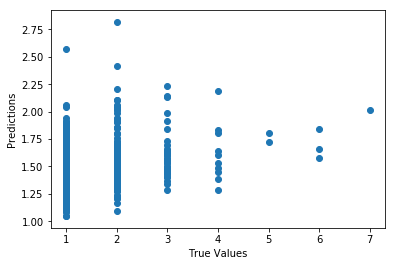

In [37]:
#y_pred_OLS =  regressor_OLS.predict(x)
plt.scatter(y_test, y_pred)
plt.xlabel("True Values", size = 10)
plt.ylabel("Predictions", size = 10)

In [38]:
print(regressor.intercept_)
print(regressor.coef_)

0.35704527007770004
[ 4.62235776e-03  3.01897732e-03 -2.62053098e-07]


## K-fold cross-validation

In [282]:
from sklearn import model_selection,metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [290]:
#Perform 10 fold Cross Validation (KFold)
scores = cross_val_score(model,x,y,cv = 10)
print ("Cross Validated Scores",scores)

Cross Validated Scores [ 0.42300101  0.45267401  0.42909772  0.43922265  0.36340948  0.23929357
 -0.20386124 -0.21564835 -0.17352004 -0.06065898]


In [292]:
kf = KFold(n_splits = 10, random_state = None, shuffle = True)

for train_index, test_index in kf.split(x):
    print ("TRAIN", train_index, "TEST", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN [   1    2    3 ... 1442 1443 1444] TEST [   0    4   37   39   48   52   54   58   70   87   90   97  100  104
  109  112  121  124  138  172  183  185  189  206  212  216  242  244
  250  270  273  274  301  307  320  327  348  368  373  424  425  429
  431  446  449  486  490  518  523  534  551  558  588  590  595  606
  610  613  619  623  639  655  695  696  699  720  726  728  755  762
  772  773  784  816  831  834  836  845  847  848  855  867  875  893
  923  927  928  931  944  946  972  976  990  995 1004 1005 1014 1020
 1035 1054 1059 1060 1062 1067 1075 1082 1102 1107 1122 1136 1137 1144
 1145 1148 1158 1171 1187 1195 1198 1212 1224 1228 1233 1261 1262 1278
 1282 1283 1294 1298 1312 1315 1316 1322 1333 1349 1352 1354 1395 1403
 1410 1413 1414 1415 1441]
TRAIN [   0    1    2 ... 1442 1443 1444] TEST [  19   43   47   55   62   69   75  108  117  129  130  132  160  165
  167  170  194  211  221  225  231  240  258  259  275  318  333  341
  354  355  379  388  394  

In [293]:
# Make Cross Validated predictions
y_pred_2 = cross_val_predict(model,x,y,cv=10)

In [296]:
#Check the R2- the proportion of variance in the dependent variable explained by the predictors
accuracy = metrics.r2_score(y, y_pred_2)
print("This is R2", accuracy)

This is R2 0.7681429268523476


Text(0.5,1,'True and Predicted Values using 10 Fold Cross Validation')

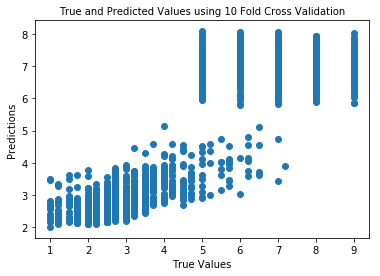

In [299]:
plt.scatter(y, y_pred_2)
plt.xlabel("True Values", size = 10)
plt.ylabel("Predictions", size = 10)
plt.title("True and Predicted Values using 10 Fold Cross Validation", size=10)

## Train one specific vehicle data

In [13]:
df = pd.read_csv("./data/3534040162621647_p_linear.csv")     # load hashbrake data
df.shape
df.isnull().values.any()

def plot_corr(df, size=3):
    """
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Display:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
    """
    corr = df.corr()   # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    
df.corr()

,StartSpeed,MaxAcceleration,Duration
StartSpeed,1.000000,0.505816,0.611248
MaxAcceleration,0.505816,1.000000,0.620213
Duration,0.611248,0.620213,1.000000


In [14]:
# import data frame
X = df.iloc[:, :-1].values
y = df.iloc[:, 2].values

# split the data frame into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25, random_state = 0)

# fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [17]:
# predicting the test set results
y_pred = regressor.predict(X_test)
y_confidence = regressor.score(X_test, y_test)
print("This is the prediction accuracy", y_confidence)

# with statsmodels
X = sm.add_constant(X)         # adding a constant
regressor_OLS = sm.OLS(y, X).fit()
regressor_OLS.summary()

This is the prediction accuracy 0.5281889363456687


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2311.
Date:                Tue, 07 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:36:15   Log-Likelihood:                -5433.7
No. Observations:                4558   AIC:                         1.087e+04
Df Residuals:                    4555   BIC:                         1.089e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5428      0.109    -23.395      0.000      -2.756      -2.330
x1             0.0274      0.001     33.041      0.000       0.026       0.029
x2             0.0155      0.000     34.540      0.000       0.015       0.016
==============================================================================
Omnibus:                      502.064   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1726.580
Skew:                           0.539   Prob(JB):                         0.00
Kurtosis:                       5.816   Cond. No.                     2.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Predictions')

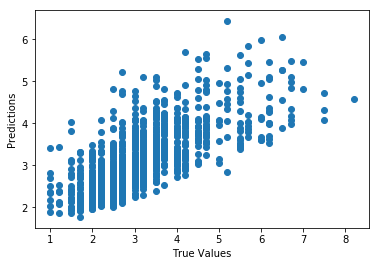

In [16]:
# plot the graph
plt.scatter(y_test, y_pred)
plt.xlabel("True Values", size = 10)
plt.ylabel("Predictions", size = 10)

## Fitting Polynomial Regression Algorithm 

In [165]:
# import data frame
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [166]:
print(X)

[[128.88]
 [126.72]
 [102.96]
 [113.76]
 [103.68]
 [131.76]
 [144.  ]
 [138.96]
 [127.8 ]
 [109.8 ]
 [108.  ]
 [127.8 ]
 [114.84]
 [106.92]
 [129.96]
 [139.68]
 [148.68]
 [135.72]
 [112.68]
 [122.76]
 [106.92]
 [131.76]
 [105.84]
 [144.72]
 [122.76]
 [114.84]
 [110.88]
 [102.96]
 [101.88]
 [130.68]
 [104.76]
 [104.76]
 [137.88]
 [127.8 ]
 [123.84]
 [126.72]
 [126.  ]
 [126.72]
 [112.68]
 [126.72]
 [145.8 ]
 [135.  ]
 [100.8 ]
 [145.8 ]
 [105.84]
 [110.88]
 [135.  ]
 [142.92]
 [126.  ]
 [138.96]
 [115.92]
 [126.  ]
 [123.84]
 [115.92]
 [126.  ]
 [144.  ]
 [144.72]
 [109.8 ]
 [ 99.72]
 [117.72]
 [114.84]
 [113.76]
 [145.8 ]
 [148.68]
 [117.  ]
 [115.92]
 [113.76]
 [129.96]
 [113.76]
 [108.72]
 [122.76]
 [106.92]
 [118.8 ]
 [115.92]
 [100.8 ]
 [140.76]
 [111.96]
 [104.76]
 [118.8 ]
 [108.72]
 [108.72]
 [146.88]
 [100.8 ]
 [111.96]
 [126.72]
 [142.92]
 [103.68]
 [129.96]
 [126.  ]
 [115.92]
 [111.96]
 [140.76]
 [126.72]
 [110.88]
 [142.92]
 [144.  ]
 [144.  ]
 [126.  ]
 [141.84]
 [100.8 ]


In [167]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

ValueError: shapes (914,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

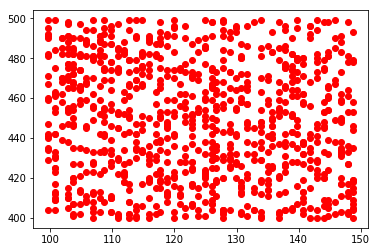

In [168]:
# visualising the Polynormial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X), color = 'blue')
plt.title("Polynormial Regression")
plt.xlabel("X values")
plt.ylabel("Predictions")
plt.show()